In [131]:
import pandas as pd

df = pd.read_csv("/Users/vanessamae/Documents/playground/python/score.csv")
df.head()

,id,gender,ses,schtyp,prog,read,write,math,science,socst,honors,cid
0,45,female,low,public,vocation,34,35,41,29,26,not enrolled,1
1,108,male,middle,public,general,34,33,41,36,36,not enrolled,1
2,15,male,high,public,vocation,39,39,44,26,42,not enrolled,1
3,67,male,low,public,vocation,37,37,42,33,32,not enrolled,1
4,153,male,middle,public,vocation,39,31,40,39,51,not enrolled,1


In [132]:
# Getting the dimension
print(f"Shape: {df.shape}")

print(f"Missing values:\n{df.isnull().sum()}")
print(f"Summary:\n{df.describe().round(2)}")


Shape: (200, 12)
Missing values:
id         0
gender     0
ses        0
schtyp     0
prog       0
read       0
write      0
math       0
science    0
socst      0
honors     6
cid        0
dtype: int64
Summary:
           id    read   write    math  science   socst     cid
count  200.00  200.00  200.00  200.00   200.00  200.00  200.00
mean   100.50   52.23   52.78   52.64    53.48   53.86   10.43
std     57.88   10.25    9.48    9.37    13.06   13.55    5.80
min      1.00   28.00   31.00   33.00    26.00   26.00    1.00
25%     50.75   44.00   45.75   45.00    44.00   46.00    5.00
50%    100.50   50.00   54.00   52.00    53.00   56.00   10.50
75%    150.25   60.00   60.00   59.00    61.00   61.00   15.00
max    200.00   76.00   67.00   75.00    99.00   99.00   20.00


In [133]:
print(f"Summary (including object):\n{df.describe(include='object')}")

Summary (including object):
        gender     ses  schtyp      prog        honors
count      200     200     200       200           194
unique       2       3       2         3             2
top     female  middle  public  academic  not enrolled
freq       109      95     168       105           142


#### Frequency

In [173]:
pd.crosstab(df['ses'], 'frequ')

col_0,frequ
ses,
high,58
low,47
middle,95


In [135]:
pd.crosstab(df['ses'], 'freq', margins=True)

col_0,freq,All
ses,,
high,58,58
low,47,47
middle,95,95
All,200,200


In [136]:
pd.crosstab(df['ses'], 'freq', margins=True, normalize='all') # Proportion with margins

col_0,freq,All
ses,,
high,0.290,0.290
low,0.235,0.235
middle,0.475,0.475
All,1.000,1.000


In [137]:
pd.crosstab(df['ses'],df['prog'], margins=True) # Crosstable Frequency

prog,academic,general,vocation,All
ses,,,,
high,42,9,7,58
low,19,16,12,47
middle,44,20,31,95
All,105,45,50,200


In [138]:
pd.crosstab(df['ses'],df['prog'], margins=True, normalize='all') # Crosstable Proportion

prog,academic,general,vocation,All
ses,,,,
high,0.210,0.045,0.035,0.290
low,0.095,0.080,0.060,0.235
middle,0.220,0.100,0.155,0.475
All,0.525,0.225,0.250,1.000


In [139]:
pd.crosstab(df['ses'],df['prog'], margins=True, normalize='index') # Crosstable Proportion: rowsum=1

prog,academic,general,vocation
ses,,,
high,0.724138,0.155172,0.120690
low,0.404255,0.340426,0.255319
middle,0.463158,0.210526,0.326316
All,0.525000,0.225000,0.250000


In [140]:
pd.crosstab(df['ses'],df['prog'], margins=True, normalize='columns') # Crosstable Proportion: colsum=1

prog,academic,general,vocation,All
ses,,,,
high,0.400000,0.200000,0.14,0.290
low,0.180952,0.355556,0.24,0.235
middle,0.419048,0.444444,0.62,0.475


In [141]:
pd.crosstab(df['ses'],df['honors'], margins=True)  # without missings

honors,enrolled,not enrolled,All
ses,,,
high,25,31,56
low,11,34,45
middle,16,77,93
All,52,142,194


In [142]:
pd.crosstab(df['ses'],df['honors'],margins=True, dropna=False) # with missings

honors,enrolled,not enrolled,NaN,All
ses,,,,
high,25,31,2,58
low,11,34,2,47
middle,16,77,2,95
All,52,142,0,200


#### Filtering Rows

In [143]:
df[df['math']>70]

,id,gender,ses,schtyp,prog,read,write,math,science,socst,honors,cid
172,33,female,low,public,academic,57,65,72,54,56,enrolled,18
178,161,female,low,public,academic,57,62,72,61,61,enrolled,18
189,200,male,middle,private,academic,68,54,75,66,66,not enrolled,19
192,174,male,middle,private,academic,68,59,71,66,56,not enrolled,20
193,95,male,high,public,academic,73,60,71,61,71,enrolled,20
195,100,female,high,public,academic,63,65,71,69,71,NaN,20
196,143,male,middle,public,vocation,63,63,75,72,66,enrolled,20
197,68,male,middle,public,academic,73,67,71,63,66,enrolled,20
198,57,female,middle,public,academic,71,65,72,66,56,enrolled,20
199,132,male,middle,public,academic,73,62,73,69,66,enrolled,20


In [144]:
df[(df['math']>70) & (df['ses']=='high')]

,id,gender,ses,schtyp,prog,read,write,math,science,socst,honors,cid
193,95,male,high,public,academic,73,60,71,61,71,enrolled,20
195,100,female,high,public,academic,63,65,71,69,71,NaN,20


In [145]:
df[(df['ses']=='middle') & (df['prog']=='academic') & (df['schtyp']=='public')]

,id,gender,ses,schtyp,prog,read,write,math,science,socst,honors,cid
18,11,male,middle,public,academic,34,46,45,39,36,not enrolled,2
50,105,female,middle,public,academic,50,41,45,44,56,not enrolled,5
61,41,male,middle,public,academic,50,40,45,55,56,not enrolled,7
68,73,female,middle,public,academic,50,52,53,39,56,not enrolled,7
71,17,female,middle,public,academic,47,57,48,44,41,not enrolled,8
81,78,female,middle,public,academic,39,54,54,53,41,not enrolled,9
93,74,female,middle,public,academic,57,50,50,51,58,not enrolled,10
96,172,male,middle,public,academic,47,52,57,53,61,not enrolled,10
100,113,male,middle,public,academic,44,52,51,63,61,not enrolled,11
108,112,female,middle,public,academic,52,59,48,55,61,not enrolled,11


#### Select Columns

In [146]:
df[['prog','gender','ses']]

,prog,gender,ses
0,vocation,female,low
1,general,male,middle
2,vocation,male,high
3,vocation,male,low
4,vocation,male,middle
...,...,...,...
195,academic,female,high
196,vocation,male,middle
197,academic,male,middle
198,academic,female,middle


#### Filter rows & selecting columns

In [147]:
df.loc[:,'gender':'prog']

,gender,ses,schtyp,prog
0,female,low,public,vocation
1,male,middle,public,general
2,male,high,public,vocation
3,male,low,public,vocation
4,male,middle,public,vocation
...,...,...,...,...
195,female,high,public,academic
196,male,middle,public,vocation
197,male,middle,public,academic
198,female,middle,public,academic


In [148]:
print("Gets the first 11 rows for columns from gender to prog\n")
df.loc[0:10,'gender':'prog']

Gets the first 11 rows for columns from gender to prog



,gender,ses,schtyp,prog
0,female,low,public,vocation
1,male,middle,public,general
2,male,high,public,vocation
3,male,low,public,vocation
4,male,middle,public,vocation
5,female,high,public,general
6,male,middle,public,vocation
7,male,middle,public,vocation
8,female,middle,public,vocation
9,male,middle,public,vocation


In [149]:
df.loc[5:10,'read':]

,read,write,math,science,socst,honors,cid
5,42,36,42,31,39,not enrolled,1
6,31,36,46,39,46,not enrolled,1
7,50,31,40,34,31,not enrolled,1
8,39,41,33,42,41,not enrolled,1
9,34,37,46,99,99,not enrolled,1
10,34,44,40,39,41,not enrolled,1


In [150]:
lowMath = df.loc[df['ses']=='low',['ses','prog','gender','math']]
lowMath

,ses,prog,gender,math
0,low,vocation,female,41
3,low,vocation,male,42
10,low,vocation,female,40
12,low,vocation,male,44
14,low,vocation,female,40
15,low,general,male,39
16,low,general,female,43
22,low,vocation,female,40
23,low,vocation,female,40
24,low,academic,female,43


In [151]:
upperMath = df.loc[df['math']>70,['ses','prog','gender','math']]
upperMath

,ses,prog,gender,math
172,low,academic,female,72
178,low,academic,female,72
189,middle,academic,male,75
192,middle,academic,male,71
193,high,academic,male,71
195,high,academic,female,71
196,middle,vocation,male,75
197,middle,academic,male,71
198,middle,academic,female,72
199,middle,academic,male,73


#### Sorting

In [152]:
df.sort_values(by='read', ascending=True)

,id,gender,ses,schtyp,prog,read,write,math,science,socst,honors,cid
16,19,female,low,public,general,28,46,43,44,51,not enrolled,2
6,164,male,middle,public,vocation,31,36,46,39,46,not enrolled,1
0,45,female,low,public,vocation,34,35,41,29,26,not enrolled,1
1,108,male,middle,public,general,34,33,41,36,36,not enrolled,1
19,117,male,high,public,vocation,34,49,39,42,56,not enrolled,2
...,...,...,...,...,...,...,...,...,...,...,...,...
171,34,female,high,private,academic,73,61,57,55,66,enrolled,18
197,68,male,middle,public,academic,73,67,71,63,66,enrolled,20
199,132,male,middle,public,academic,73,62,73,69,66,enrolled,20
194,61,female,high,public,academic,76,63,60,99,99,enrolled,20


#### Creating Columns

In [153]:
newdf = df.loc[df['ses']=='high', ['ses', 'read', 'write', 'math', 'science', 'socst']]
newdf

,ses,read,write,math,science,socst
2,high,39,39,44,26,42
5,high,42,36,42,31,39
11,high,39,33,38,47,41
19,high,34,49,39,42,56
25,high,44,38,49,39,46
37,high,41,59,42,34,51
41,high,50,42,50,36,61
43,high,50,40,39,49,47
56,high,47,41,54,42,56
57,high,36,57,42,50,41


In [177]:
newdf['average']=newdf[['read','write', 'math', 'science', 'socst']].mean(axis=1)
newdf

,ses,read,write,math,science,socst,average
2,high,39,39,44,26,42,38.0
5,high,42,36,42,31,39,38.0
11,high,39,33,38,47,41,39.6
19,high,34,49,39,42,56,44.0
25,high,44,38,49,39,46,43.2
37,high,41,59,42,34,51,45.4
41,high,50,42,50,36,61,47.8
43,high,50,40,39,49,47,45.0
56,high,47,41,54,42,56,48.0
57,high,36,57,42,50,41,45.2


In [155]:
df.read.mean()

np.float64(52.23)

In [156]:
import numpy as np
np.mean(df['read'])

np.float64(52.23)

In [157]:
df.read.std()        # divided by n-1
round(df.read.std(),3)

np.float64(10.253)

In [158]:
np.std(df['read'])  # divided by n
round(np.std(df['read']),3)

np.float64(10.227)

In [159]:
np.std(df['read'], ddof=1)  # divided by n-1
round(np.std(df['read'], ddof=1),3)

np.float64(10.253)

In [160]:
np.percentile(df['read'],75)

np.float64(60.0)

In [161]:
np.percentile(df['read'],[90,95])

array([66.2, 68. ])

In [162]:
np.percentile(df['math'],50)

np.float64(52.0)

In [163]:
pct = np.array([50,74,90,95,99])
np.percentile(df['read'], pct)

array([50.  , 60.  , 66.2 , 68.  , 73.03])

In [164]:
pct = np.array([50,74,90,95,99])
np.percentile(df['read'], (50,74,90,95,99))

array([50.  , 60.  , 66.2 , 68.  , 73.03])

#### Summary by Group

In [165]:
df.groupby("ses")["math"].agg(["mean", "std"])

,mean,std
ses,,
high,56.172414,8.691875
low,49.170213,8.876738
middle,52.210526,9.355730


In [166]:
df.groupby(["ses", "prog"])['math'].agg(["mean", "std"]).round(2)

mean   std
ses    prog                 
high   academic  58.43  7.92
       general   52.00  6.34
       vocation  48.00  9.80
low    academic  53.95  9.70
       general   47.56  7.57
       vocation  43.75  4.71
middle academic  56.32  8.88
       general   51.10  7.61
       vocation  47.10  8.49

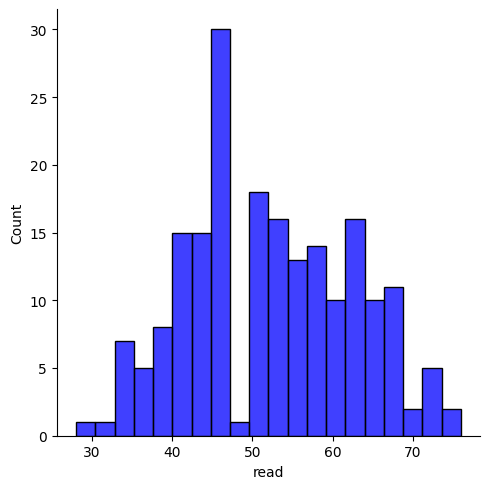

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(df['read'], color='blue', bins=20)
plt.show()

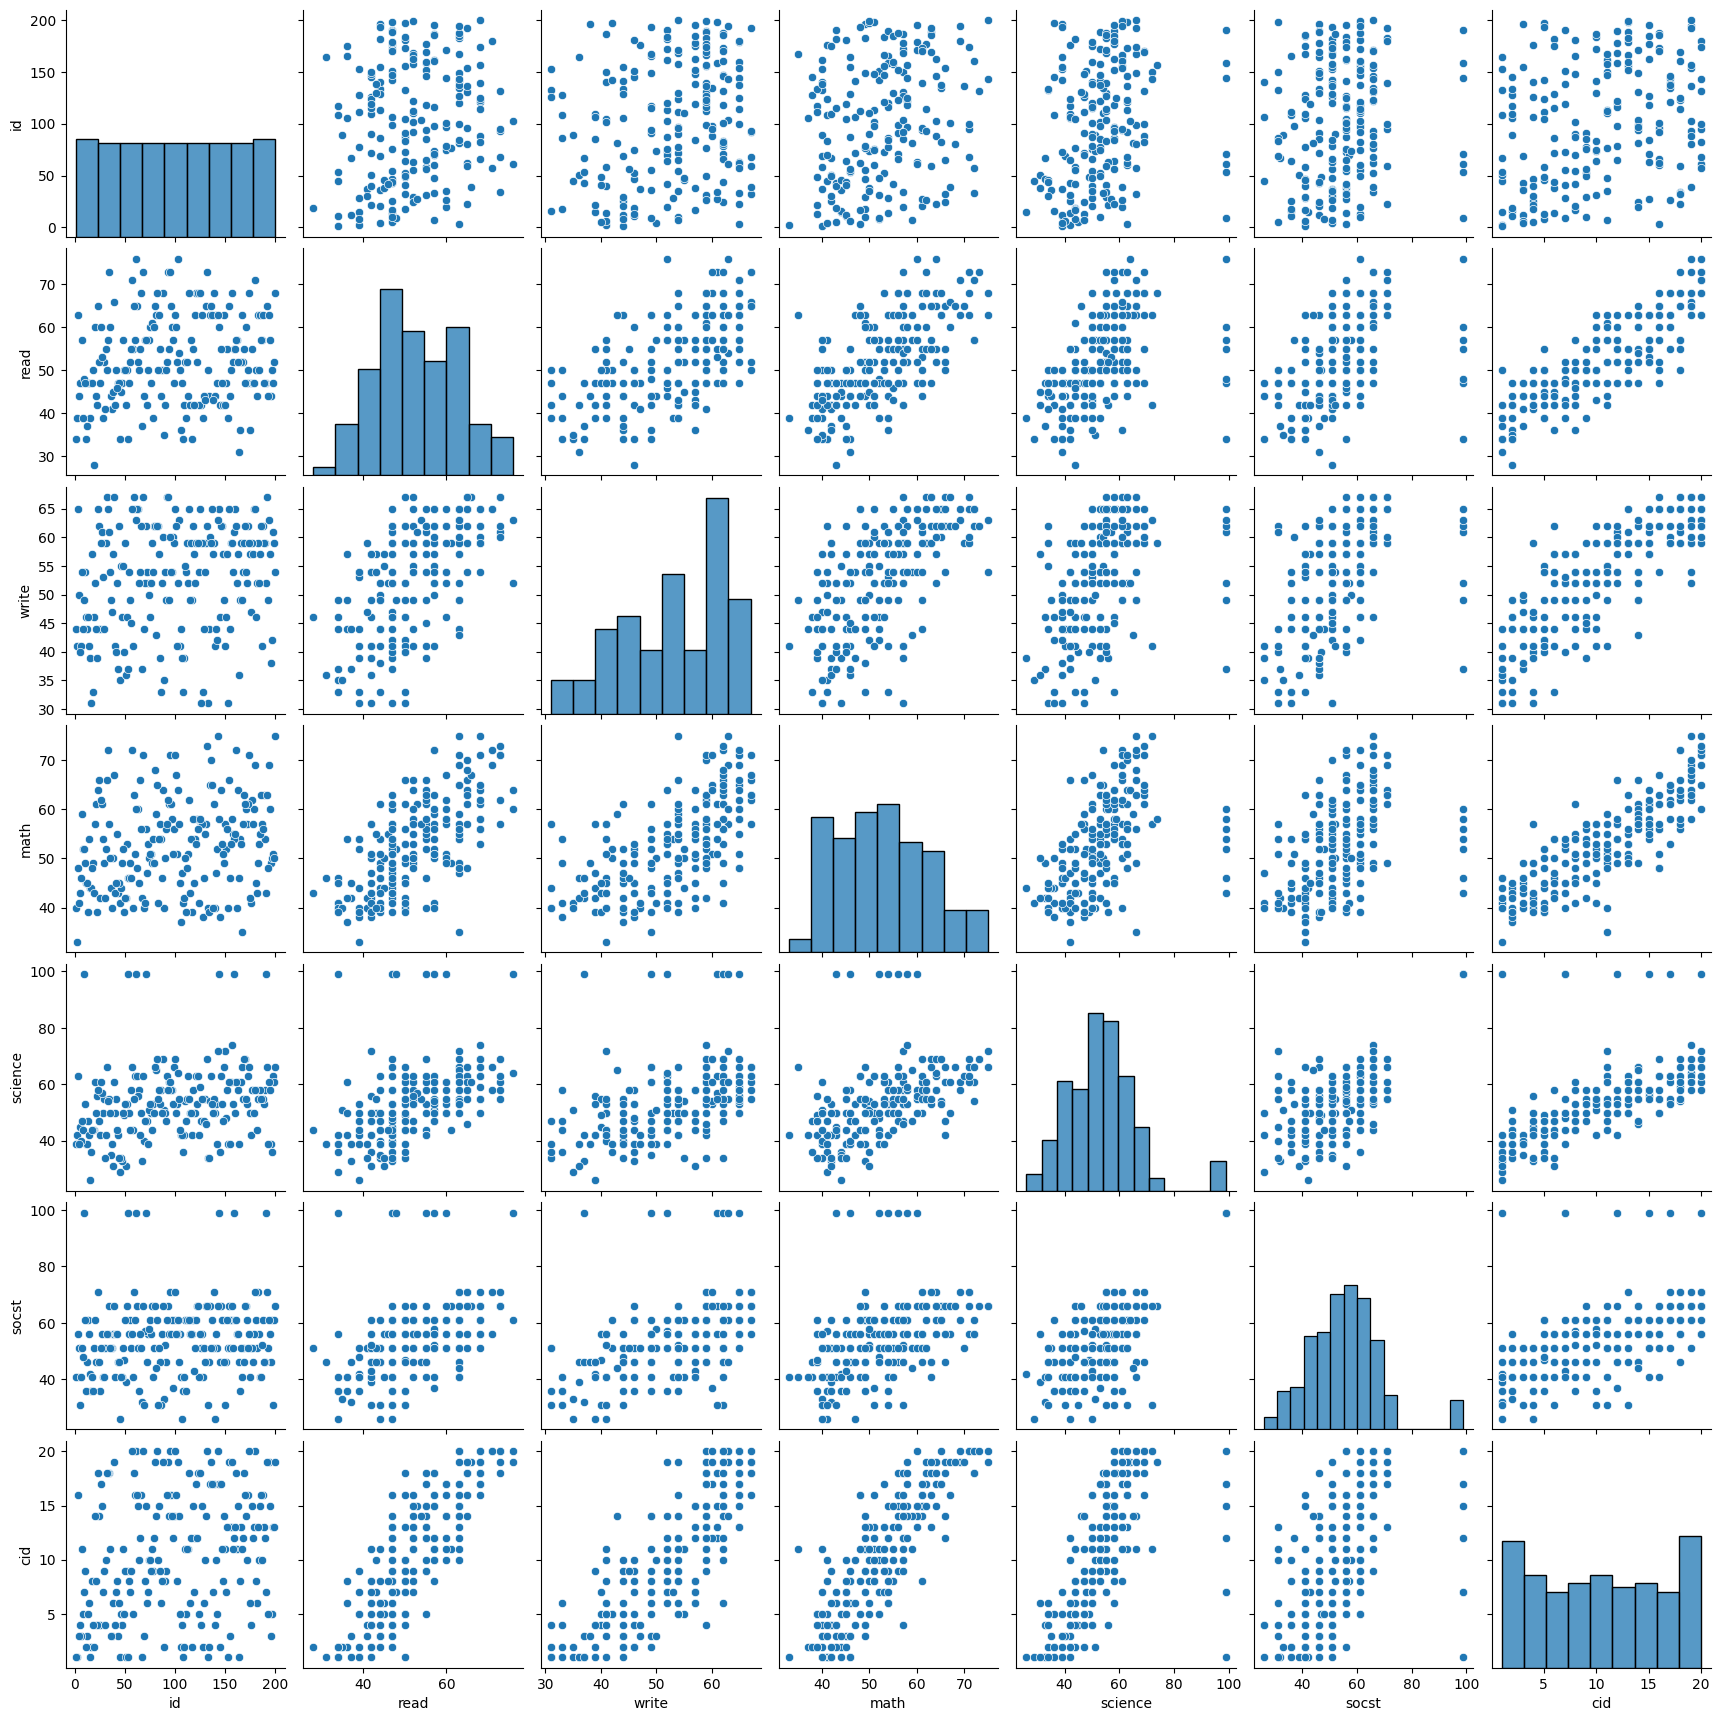

In [168]:
sns.pairplot(data=df)

<Axes: xlabel='prog', ylabel='math'>

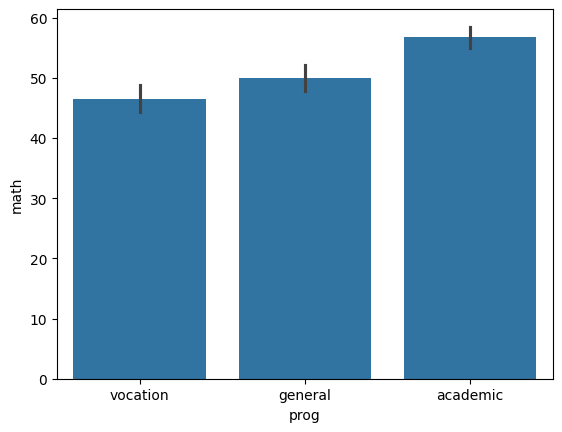

In [169]:
sns.barplot(x='prog',y='math',data=df, estimator=np.mean)

<Axes: xlabel='prog', ylabel='count'>

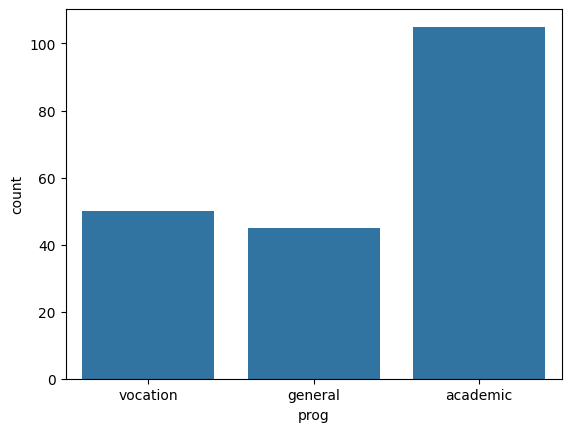

In [170]:
sns.countplot(x='prog',data=df)

In [171]:
df

,id,gender,ses,schtyp,prog,read,write,math,science,socst,honors,cid
0,45,female,low,public,vocation,34,35,41,29,26,not enrolled,1
1,108,male,middle,public,general,34,33,41,36,36,not enrolled,1
2,15,male,high,public,vocation,39,39,44,26,42,not enrolled,1
3,67,male,low,public,vocation,37,37,42,33,32,not enrolled,1
4,153,male,middle,public,vocation,39,31,40,39,51,not enrolled,1
...,...,...,...,...,...,...,...,...,...,...,...,...
195,100,female,high,public,academic,63,65,71,69,71,NaN,20
196,143,male,middle,public,vocation,63,63,75,72,66,enrolled,20
197,68,male,middle,public,academic,73,67,71,63,66,enrolled,20
198,57,female,middle,public,academic,71,65,72,66,56,enrolled,20


<Axes: xlabel='schtyp', ylabel='socst'>

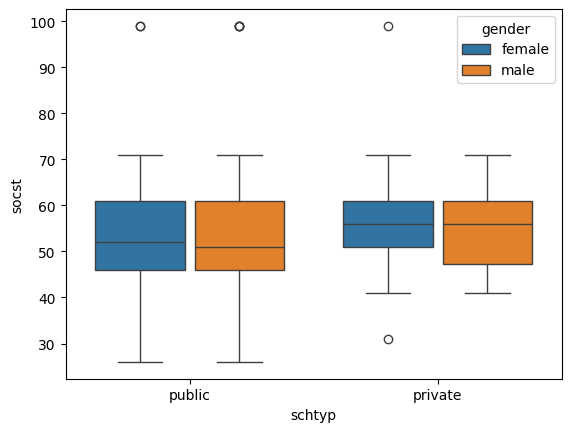

In [172]:
sns.boxplot(x='schtyp',y='socst',data=df, hue='gender', gap=0.1)